In [ ]:
"""Dataset Info"""

"""
Name of dataset: Data scientist salary

Dataset link: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor

Dataset download: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor/download?datasetVersionNumber=1

License: CC0: Public Domain

Size: data_cleaned_2021.csv is 3.12 MB

"""

In [ ]:
"""
Characteristics of this dataset:

This ROR data was made by scrapping the job postings related to the position of 'Data Scientist' from www.glassdoor.com in USA, it used selenium to scrap the data. After scrapping the raw data, it removed the duplicated rows from it which reduced the records from 1000 to 742. After this, several simplifications were performed to make the data user friendly for further data analysis and modelling.

With each job, it got the following columns: Job title, Salary Estimate, Job Description, Rating, Company, Location, Company , Headquarters, , , any Size, Company Founded Date, Type of Ownership, Industry, Sector, Revenue, Competitors.

Note: Columns with value -1 means either the data scraping was unsuccessful for that or the data was not present.
"""

In [42]:
import pandas as pd
import bqplot
import json
import pandas as pd
import bqplot.pyplot as plt
import re
import numpy as np
import random
from functools import reduce
import seaborn as sns
from ast import literal_eval
# import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
df = pd.read_csv('data_cleaned_2021.csv')
df[:10]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 - 500,2000,...,0,0,0,1,0,1,0,data scientist,na,na
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 - 1000,2008,...,0,0,0,0,0,0,0,data scientist,na,na
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 - 500,2005,...,1,0,0,0,0,0,0,data scientist,na,M
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+,2014,...,0,0,0,0,0,0,0,other scientist,na,P
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 - 200,2009,...,0,0,0,0,0,0,0,data scientist,na,na


In [64]:
#Chart 1: This code demonstrates the quantity distribution of different occupations
fig = plt.figure(title="Count Distribution of Job Title")
job_counts = df['Job Title'].value_counts()
x = list(job_counts.index)
y = job_counts.values
plt.xlabel('Job Titles')
plt.ylabel('Count')
bar = plt.bar(x, y)
fig

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top'…

In [65]:
#If we need to observe the distribution of a larger number of positions in further detail, we need to filter the data to further display the details.
#Chart 2: Job titles accounting for the top 3%
fig = plt.figure(title="Count Distribution of top 3% Job Title")
job_counts = df['Job Title'].value_counts()
job_counts = job_counts.iloc[:int(len(job_counts)/33)]
x = list(job_counts.index)
y = job_counts.values
plt.xlabel('Job Titles')
plt.ylabel('Count')
bar = plt.bar(x, y)
fig

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top'…

In [66]:
#Chart 3: Similarly, what is shown here is the distribution of the number of work locations.
fig = plt.figure(title="Count Distribution of Location")
location_counts = df['Location'].value_counts()
x = list(location_counts.index)
y = location_counts.values
plt.xlabel('Location')
plt.ylabel('Count')
bar = plt.bar(x, y)
fig

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top'…

In [68]:
#Chart 4: Location accounting for the top 5%
fig = plt.figure(title="Count Distribution of top 5% Location")
location_counts = df['Location'].value_counts()
location_counts = location_counts.iloc[:int(len(location_counts)/20)]
x = list(location_counts.index)
y = location_counts.values
plt.xlabel('Location')
plt.ylabel('Count')
bar = plt.bar(x, y)
fig

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top'…

In [69]:
#Chart 5: Headquarters accounting for the top 5%
import bqplot.pyplot as plt
fig = plt.figure(title="Count Distribution of top 5% Headquarters")
Headquarters_counts = df['Headquarters'].value_counts()
Headquarters_counts = Headquarters_counts.iloc[:int(len(Headquarters_counts)/20)]
x = list(Headquarters_counts.index)
y = Headquarters_counts.values
plt.xlabel('Headquarters')
plt.ylabel('Count')
bar = plt.bar(x, y)
fig

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top'…

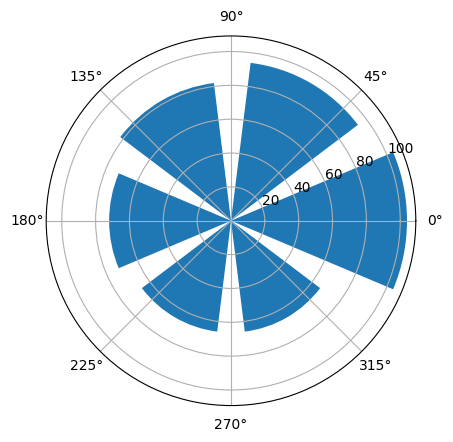

In [74]:
#Chart 6: Also in order to make the contrast between professions stronger, I used a circular arrangement to highlight the contrast.
import numpy as np
import matplotlib.pyplot as plt



Headquarters_counts = df['Headquarters'].value_counts()
Headquarters_counts = Headquarters_counts.iloc[:int(len(Headquarters_counts)/33)]

values = Headquarters_counts.values
categories = list(Headquarters_counts.index)


categories += categories[:1]
values += values[:1]


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

theta = np.linspace(0, 2*np.pi, len(categories) - 1, endpoint=False).tolist()

bars = ax.bar(theta, values, width = 0.8)


plt.show()

